In [11]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from net import Net
from mnist_helper import load_training, load_test


# Load MNIST training- and test data.
training_images, training_labels = load_training()
test_images, test_labels = load_test()


# Init net with two hidden layers with 32 neurons each.
net = Net([784, 32, 32, 10])


In [12]:

# Test net with test data and store percentage of correctly classified images.
test_results = []
def test_net():
    guesses = net.feedforward(test_images)
    corrects = sum(y.argmax() == t.argmax() for y, t in zip(guesses, test_labels))
    test_results.append(corrects / len(test_images))

# Initial test without training.
test_net()
print('No training: Correctly classified {:.2%}'.format(test_results[0]))


No training: Correctly classified 8.37%


In [13]:

# Set hyperparameters for training.
epochs = 200
batch_size = 10
learning_rate = 0.1

# Train the net.
for epoch in range(1, epochs + 1):
    net.train(training_images, training_labels, batch_size, learning_rate)
    test_net()
    if epoch < 10 or not epoch % 10:
        print('Epoch {}: Correctly classified {:2%}'.format(epoch, test_results[-1]))


Epoch 1: Correctly classified 61.110000%
Epoch 2: Correctly classified 77.620000%
Epoch 3: Correctly classified 82.390000%
Epoch 4: Correctly classified 84.810000%
Epoch 5: Correctly classified 86.390000%
Epoch 6: Correctly classified 87.420000%
Epoch 7: Correctly classified 88.210000%
Epoch 8: Correctly classified 88.800000%
Epoch 9: Correctly classified 89.230000%
Epoch 10: Correctly classified 89.660000%
Epoch 20: Correctly classified 92.010000%
Epoch 30: Correctly classified 92.570000%
Epoch 40: Correctly classified 93.200000%
Epoch 50: Correctly classified 93.790000%
Epoch 60: Correctly classified 94.060000%
Epoch 70: Correctly classified 94.140000%
Epoch 80: Correctly classified 94.370000%
Epoch 90: Correctly classified 94.490000%
Epoch 100: Correctly classified 94.410000%
Epoch 110: Correctly classified 94.470000%
Epoch 120: Correctly classified 94.450000%
Epoch 130: Correctly classified 94.400000%
Epoch 140: Correctly classified 94.410000%
Epoch 150: Correctly classified 94.520

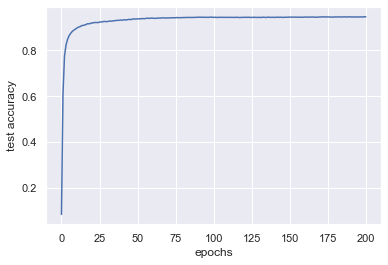

In [14]:

# Show test results
ax = sns.lineplot(x=range(epochs + 1), y=test_results)
ax.set(xlabel='epochs', ylabel='test accuracy')
plt.show()
